# Think Bayes

This notebook presents code and exercises from Think Bayes, second edition.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [8]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import math
import numpy as np
import thinkbayes
from thinkbayes import Pmf, Suite, Joint, thinkplot

In [9]:
class Battleship(Suite, Joint):
    lam = 1
    
    def Likelihood(self, hypo, data):
        x_actual, y_actual = hypo
        x_guess, y_guess, result = data
        d = np.hypot(x_guess-x_actual, y_guess-y_actual)
        p_hit = np.exp(-self.lam * d)
        return p if result == 'hit' else 1-p

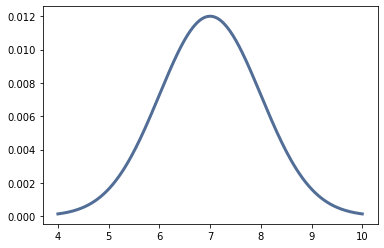

In [19]:
gap = thinkbayes.MakeNormalPmf(7, 1, 3)
metapmf = thinkbayes.Pmf()
thinkplot.plot(gap)

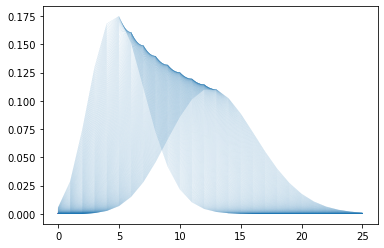

In [20]:
for t, p in gap.Items():
    arrivals = thinkbayes.MakePoissonPmf(1.3 * t, 25)
    thinkplot.plot(arrivals, color='C0', linewidth=0.1)
    metapmf[arrivals] = p

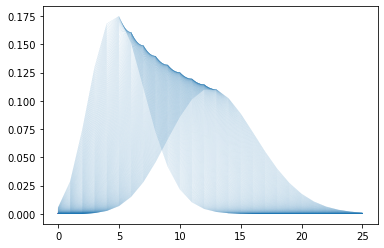

In [22]:
metapmf = thinkbayes.Pmf()
for t, p in gap.Items():
    arrivals = thinkbayes.MakePoissonPmf(1.3 * t, 25)
    thinkplot.plot(arrivals, color='C0', linewidth=0.1)
    metapmf[arrivals] = p

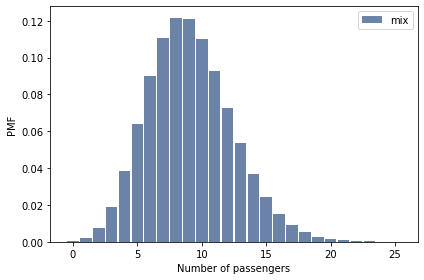

In [24]:
mix = thinkbayes.MakeMixture(metapmf)
mix.Mean()
thinkplot.Hist(mix)
thinkplot.decorate(xlabel='Number of passengers',
                   ylabel='PMF')

In [25]:
mix[10]

0.11021342082025383